 1990


355.7463687587808 1.3816888140344414 0.7771999578943733 0.5616862973284139


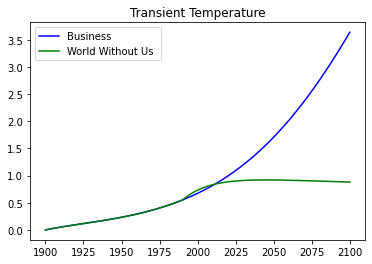

In [3]:
import numpy
import matplotlib.pyplot as plt
import math

#Variables

timeStep = 1 #years
eqCO2 = 280 #equilibrium CO2
initCO2 = 290 #initial CO2
CO2_exp = 0.0225 #exponential Growth
CO2RampExp = 0.01 # Drawdown Rate
aerosol_Wm2_now = -0.75 #Aerosol Radiative forcing in Watts/m2
Watts_m2 = 4
climate_sensitivity2x = 3 #Doubled CO2 climate sensitivity
climate_sensitivityWm2 = climate_sensitivity2x/Watts_m2
TResponseTime = 20



years = [1900] 
bauCO2 = [initCO2] # Case 1 - Business as usual - Atmospheric CO2
incCO2 = [0] 
rfCO2 = [0] #Radiative forcing 
rfMask = [0] #Radiative Forcing from Masking
rfCO2Ramp = [0]
rfMaskRamp = [0]
rfTot = [0] #Total Radiative Forcing
Teq =[0] #Equilibrium Temperature
TTrans = [0] #Time-Evolving Temperature
rampCO2 = [initCO2]
rfTotRamp = [0]
rfTotRamp = [0]
TeqRamp = [0]
TTransRamp = [0]

nYear = int(input(""))


while years[-1]<2100:
    years.append(years[-1] +timeStep)
    bauCO2.append(eqCO2 + (bauCO2[-1]-eqCO2)*(1+CO2_exp*timeStep))
    incCO2.append((bauCO2[-1]-bauCO2[-2])/timeStep)
    rfCO2.append(Watts_m2* math.log(bauCO2[-1]/eqCO2)/math.log(2))

    
iYear = years.index(nYear+1)
#printing the reqired (iYear, bauCO2[iYear], rfCO2[iYear])
aerosolCoeff = aerosol_Wm2_now / \
      ((bauCO2[iYear]-bauCO2[iYear-1])/timeStep)

for i in range (1,len(years)):
    rfMask.append(max(incCO2[i]*aerosolCoeff, aerosol_Wm2_now))
    rfTot.append(rfCO2[i]*climate_sensitivityWm2)
    Teq.append(rfTot[i]*climate_sensitivityWm2)
    TTrans.append(TTrans[-1]+(Teq[i]-TTrans[-1])*timeStep/TResponseTime)
    
print(bauCO2[iYear],rfCO2[iYear],Teq[iYear],TTrans[iYear])



for i in range(1, iYear):
    rampCO2.append(bauCO2[i])
    rfCO2Ramp.append(rfCO2[i])
    rfMaskRamp.append(rfMask[i])
    TTransRamp.append(TTrans[i])
    TeqRamp.append(Teq[i])
    rfTotRamp.append(rfTot[i])

for i in range(iYear, len(years)):
    rampCO2.append(rampCO2[-1]+(eqCO2*1.2-rampCO2[-1]) *(CO2RampExp*timeStep))
    rfCO2Ramp.append(Watts_m2* math.log(rampCO2[i]/eqCO2)/math.log(2))
    rfMaskRamp.append(0)
    rfTotRamp.append(rfCO2Ramp[i])
    TeqRamp.append(rfCO2Ramp[i]*climate_sensitivityWm2)
    TTransRamp.append(TTransRamp[-1] + (TeqRamp[i] -TTransRamp[-1])*timeStep/TResponseTime)

plt.title("Transient Temperature")
plt.plot(years, TTrans, 'b', label="Business")
plt.plot(years, TTransRamp,'g', label="World Without Us ")
leg = plt.legend()
plt.show()